# Importing Libraries

In [6]:
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import load_img
from keras.utils import to_categorical
from keras_preprocessing.image import load_img
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
import os
import pandas as pd
import numpy as np

# FER 2013 Dataset Path

In [22]:
TRAIN_DIR = "C:\\Users\\muham\\Downloads\\Muarij\\FER\\images\\train"
TEST_DIR = "C:\\Users\\muham\\Downloads\\Muarij\\FER\\images\\validation"

# Function to Create a DataFrame for Image Paths and Labels

In [11]:
def createdataframe(dir):
    image_paths = []
    labels = []
    for label in os.listdir(dir):
        for imagename in os.listdir(os.path.join(dir, label)):
            image_paths.append(os.path.join(dir, label, imagename))
            labels.append(label)
        print(label, "completed")
    return image_paths, labels

# Creating a DataFrame for Training Data

In [12]:
train = pd.DataFrame()
train['image'], train['label'] = createdataframe(TRAIN_DIR)
print(train)

angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed
                                                   image     label
0      C:\Users\muham\Downloads\Muarij\archive (6)\im...     angry
1      C:\Users\muham\Downloads\Muarij\archive (6)\im...     angry
2      C:\Users\muham\Downloads\Muarij\archive (6)\im...     angry
3      C:\Users\muham\Downloads\Muarij\archive (6)\im...     angry
4      C:\Users\muham\Downloads\Muarij\archive (6)\im...     angry
...                                                  ...       ...
28816  C:\Users\muham\Downloads\Muarij\archive (6)\im...  surprise
28817  C:\Users\muham\Downloads\Muarij\archive (6)\im...  surprise
28818  C:\Users\muham\Downloads\Muarij\archive (6)\im...  surprise
28819  C:\Users\muham\Downloads\Muarij\archive (6)\im...  surprise
28820  C:\Users\muham\Downloads\Muarij\archive (6)\im...  surprise

[28821 rows x 2 columns]


# Creating a DataFrame for Testing Data

In [13]:
test = pd.DataFrame()
test['image'], test['label'] = createdataframe(TEST_DIR)
print(test)

angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed
                                                  image     label
0     C:\Users\muham\Downloads\Muarij\archive (6)\im...     angry
1     C:\Users\muham\Downloads\Muarij\archive (6)\im...     angry
2     C:\Users\muham\Downloads\Muarij\archive (6)\im...     angry
3     C:\Users\muham\Downloads\Muarij\archive (6)\im...     angry
4     C:\Users\muham\Downloads\Muarij\archive (6)\im...     angry
...                                                 ...       ...
7061  C:\Users\muham\Downloads\Muarij\archive (6)\im...  surprise
7062  C:\Users\muham\Downloads\Muarij\archive (6)\im...  surprise
7063  C:\Users\muham\Downloads\Muarij\archive (6)\im...  surprise
7064  C:\Users\muham\Downloads\Muarij\archive (6)\im...  surprise
7065  C:\Users\muham\Downloads\Muarij\archive (6)\im...  surprise

[7066 rows x 2 columns]


# Importing tqdm for Progress Visualization

In [14]:
from tqdm.notebook import tqdm

# Function to Extract Features from Images

In [15]:
def extract_features(images):
    features = []
    for image in tqdm(images):
        img = load_img(image, color_mode='grayscale')
        img = np.array(img)
        features.append(img)
    features = np.array(features)
    features = features.reshape(len(features), 48, 48, 1)
    return features

# Extracting Features for Training and Testing Data

In [16]:
train_features = extract_features(train['image'])
test_features = extract_features(test['image'])

  0%|          | 0/28821 [00:00<?, ?it/s]

  0%|          | 0/7066 [00:00<?, ?it/s]

# Normalizing Image Data

In [17]:
x_train = train_features / 255.0
x_test = test_features / 255.0

# Installing Scikit-Learn

In [18]:
pip install scikit-learn


Note: you may need to restart the kernel to use updated packages.


# Encoding and Transforming Labels

In [19]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(train['label'])
y_train = le.transform(train['label'])
y_test = le.transform(test['label'])
y_train = to_categorical(y_train, num_classes=7)
y_test = to_categorical(y_test, num_classes=7)

# Facial Analysis Model

In [20]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense

# Sequential model
model = Sequential()

# Convolutional layers
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', input_shape=(48, 48, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

model.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

# Flattening
model.add(Flatten())

# Fully connected layers
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))

# Output layer
model.add(Dense(7, activation='softmax'))

# Model compilation
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [13]:
model.fit(x=x_train, y=y_train, batch_size=128, epochs=100, validation_data=(x_test, y_test))

Epoch 1/100
226/226 [==============================] - 25s 46ms/step - loss: 1.8230 - accuracy: 0.2448 - val_loss: 1.8022 - val_accuracy: 0.2628
Epoch 2/100
226/226 [==============================] - 9s 42ms/step - loss: 1.7697 - accuracy: 0.2655 - val_loss: 1.6676 - val_accuracy: 0.3150
Epoch 3/100
226/226 [==============================] - 10s 44ms/step - loss: 1.6284 - accuracy: 0.3520 - val_loss: 1.4734 - val_accuracy: 0.4452
Epoch 4/100
226/226 [==============================] - 10s 45ms/step - loss: 1.5033 - accuracy: 0.4113 - val_loss: 1.3525 - val_accuracy: 0.4750
Epoch 5/100
226/226 [==============================] - 9s 42ms/step - loss: 1.4316 - accuracy: 0.4462 - val_loss: 1.2980 - val_accuracy: 0.5117
Epoch 6/100
226/226 [==============================] - 10s 43ms/step - loss: 1.3753 - accuracy: 0.4682 - val_loss: 1.2638 - val_accuracy: 0.5211
Epoch 7/100
226/226 [==============================] - 10s 44ms/step - loss: 1.3465 - accuracy: 0.4819 - val_loss: 1.2395 - val_accu

# Saving the Model Architecture and Weights

In [14]:
model_json = model.to_json()
with open("emotiondetector.json", 'w') as json_file:
    json_file.write(model_json)
model.save("emotiondetector.h5")

# Model Evaluation and Performance Metrics

221/221 [==============================] - 1s 6ms/step
Accuracy: 0.63
Classification Report:
               precision    recall  f1-score   support

       angry       0.58      0.52      0.55       960
     disgust       0.82      0.55      0.66       111
        fear       0.54      0.40      0.46      1018
       happy       0.80      0.84      0.82      1825
     neutral       0.52      0.65      0.58      1216
         sad       0.50      0.50      0.50      1139
    surprise       0.77      0.77      0.77       797

    accuracy                           0.63      7066
   macro avg       0.65      0.61      0.62      7066
weighted avg       0.63      0.63      0.63      7066

Confusion Matrix:
 [[ 499    7   87   70  155  117   25]
 [  18   61   14    4    7    4    3]
 [ 109    1  408   68  158  184   90]
 [  38    0   32 1530  114   73   38]
 [  69    1   51  122  795  165   13]
 [ 115    3  108   68  263  569   13]
 [  12    1   59   53   37   18  617]]


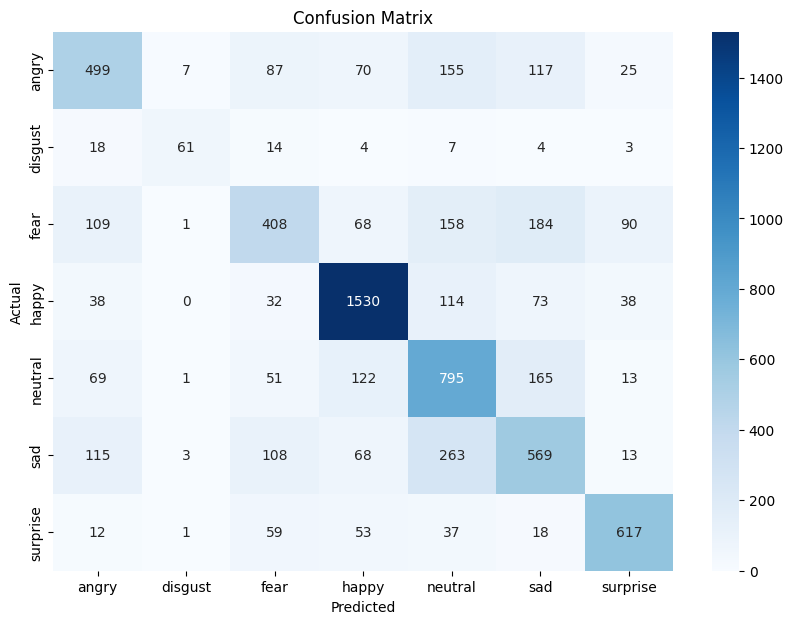

In [22]:
import numpy as np
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from keras.models import load_model

# Load the model
model = load_model("emotiondetector.h5")  # Make sure to use the correct model file name

# Assuming x_test and y_test are already defined and preprocessed
# Convert one-hot encoded labels back to class labels
y_test_classes = np.argmax(y_test, axis=1)  # This line defines y_test_classes

# Predicting the classes for test data
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert probabilities to class labels

# Accuracy Score
accuracy = accuracy_score(y_test_classes, y_pred_classes)
print(f"Accuracy: {accuracy:.2f}")

# Classification Report (includes precision, recall, F1-score)
report = classification_report(y_test_classes, y_pred_classes, target_names=le.classes_)
print("Classification Report:\n", report)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test_classes, y_pred_classes)
print("Confusion Matrix:\n", conf_matrix)

# Plotting the Confusion Matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()


# Loading and Using the Trained Model for Emotion Prediction

In [24]:
import json
import numpy as np
from tensorflow.keras.models import model_from_json
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Load model architecture from JSON file
with open("emotiondetector.json", 'r') as json_file:
    model_json = json_file.read()

# Create model from JSON
model = model_from_json(model_json)

# Load weights into the model
model.load_weights("emotiondetector.h5")

# Define emotion labels corresponding to model output classes
emotion_labels = ['Anger', 'Disgust', 'Fear', 'Happiness', 'Neutral', 'Sadness', 'Surprise']

def preprocess_image(image_path):
    img = load_img(image_path, target_size=(48, 48), color_mode='grayscale')  # Adjust size as necessary
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array = img_array / 255.0  # Normalize pixel values
    return img_array

def predict_emotion(image_path):
    processed_image = preprocess_image(image_path)
    prediction = model.predict(processed_image)
    predicted_class = np.argmax(prediction, axis=1)  # Get class index
    return predicted_class[0]

# Path to the image you want to classify
image_path = r"C:\Users\muham\Downloads\Muarij\FER\images\validation\happy\80.jpg"  # Use raw string for Windows paths

# Predict emotion for the specified image 
predicted_index = predict_emotion(image_path)
predicted_emotion = emotion_labels[predicted_index]

print(f"The predicted emotion is: {predicted_emotion}")


1/1 [==============================] - 0s 146ms/step
The predicted emotion is: Happiness


# Real-Time Facial Emotion Recognition Using Webcam

In [1]:
import cv2
from keras.models import model_from_json
import numpy as np

# Load the pre-trained model architecture from JSON file
json_file = open("emotiondetector.json", 'r')
model_json = json_file.read()
json_file.close()
model = model_from_json(model_json)

# Load the pre-trained model weights
model.load_weights("emotiondetector.h5")

# Load the Haar cascade classifier for face detection
haar_file = cv2.data.haarcascades + 'haarcascade_frontalface_default.xml'
face_cascade = cv2.CascadeClassifier(haar_file)

# Define a function to extract features from an image
def extract_features(image):
    feature = np.array(image)
    feature = feature.reshape(1, 48, 48, 1)
    return feature / 255.0

# Open the webcam (camera)
webcam = cv2.VideoCapture(0)

# Define labels for emotion classes
labels = {0: 'angry', 1: 'disgust', 2: 'fear', 3: 'happy', 4: 'neutral', 5: 'sad', 6: 'surprise'}

while True:
    # Read a frame from the webcam
    i, im = webcam.read()

    # Convert the frame to grayscale
    gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)

    # Detect faces in the grayscale frame
    faces = face_cascade.detectMultiScale(im, 1.3, 5)

    try:
        # For each detected face, perform facial emotion recognition
        for (p, q, r, s) in faces:
            # Extract the region of interest (ROI) which contains the face
            image = gray[q:q + s, p:p + r]

            # Draw a rectangle around the detected face
            cv2.rectangle(im, (p, q), (p + r, q + s), (255, 0, 0), 2)

            # Resize the face image to the required input size (48x48)
            image = cv2.resize(image, (48, 48))

            # Extract features from the resized face image
            img = extract_features(image)

            # Make a prediction using the trained model
            pred = model.predict(img)

            # Get the predicted label for emotion
            prediction_label = labels[pred.argmax()]

            # Display the predicted emotion label near the detected face
            cv2.putText(im, f'Emotion: {prediction_label}', (p - 10, q - 10),
                        cv2.FONT_HERSHEY_COMPLEX_SMALL, 2, (0, 0, 255))

        # Display the frame with annotations in real-time
        cv2.imshow("Real-time Facial Emotion Recognition", im)

        # Break the loop if the 'Esc' key is pressed
        if cv2.waitKey(1) == 27:
            break

    except cv2.error:
        pass

# Release the webcam and close all OpenCV windows
webcam.release()
cv2.destroyAllWindows()

1/1 [==============================] - 0s 955us/step
